## Maps Analysis Notebooks

### `plotting_scores_exploration.ipynb`

This notebook facilitates the exploration of maps with statistical metrics falling within a specified range. It enables you to analyze maps based on their scores, e.g. boundary SCD, or cross-score. 
Now, the notebook plots maps predicted for 15 randomly selected sites with average stat metrics in the requested range.

In [17]:
import pandas as pd
import h5py
from random import sample

from akita_utils.utils import ut_dense
from akita_utils.stats_utils import get_map_matrix, plot_map

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df with scores averaged over targets, and backgrounds
scores_tsv = "./../../processed_data/filtered_base_mouse_ctcf_scored_and_averaged.tsv"
scores_df = pd.read_table(scores_tsv, sep="\t")

In [3]:
# df with all experiments
experiments_tsv = "./../../input_data/filtered_base_mouse_ctcf_boundary.tsv"
experiments_df = pd.read_table(experiments_tsv, sep="\t")

In [4]:
# parameters
nr_backgrounds = len(experiments_df.background_index.unique())
nr_sites = len(experiments_df) // nr_backgrounds

model_index = 1
head_index = 1

# background and target ids
request_bg_id = 3
request_tg_ids = [3]


# Restricting score

In [5]:
# Averaging over models

model_indices = [1, 2]
col_names = ["boSCD", "dotSCD", "dot-score", "cross-score", "x-score"]

for score in col_names:
    ave_column_name = f"{score}_avg"
    columns_to_ave = [f"{score}_m{model_index}" for model_index in model_indices]
    scores_df[ave_column_name] = scores_df[columns_to_ave].mean(axis=1)

In [6]:
nr_maps = 15   # number of randomly selected ctcf sites with scores in a desired range

# column name with the desired score
# column_name = "boSCD_avg"
column_name = "cross-score_avg"

# upper- and lowerbound for the score
upperbound = 1.2
lowerbound = 0.6

In [7]:
restricted_seq_ids = list(scores_df[(scores_df[column_name] <= upperbound) & (scores_df[column_name] > lowerbound)].seq_id)

In [8]:
# number of sites with score in this range
len(restricted_seq_ids)

145

In [9]:
if len(restricted_seq_ids) <= nr_maps:
    sample = restricted_seq_ids
else:
    sample = sample(restricted_seq_ids, nr_maps)
sample.sort()

In [10]:
sample_exp_id = [experiments_df.iloc[sample_id]["exp_id"] for sample_id in sample]

# Boundary maps

In [13]:
# use if you want to visualize maps with boundary score in a desired range

In [11]:
job_h5_file = f"/scratch2/smaruj/all_dots_vs_boundaries/maps_boundaries_all_motifs_m{model_index}/MAPS_OUT.h5"

SEQ_ID:  74
	-target:  3


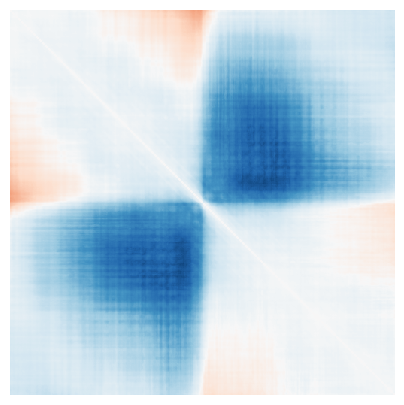

SEQ_ID:  220
	-target:  3


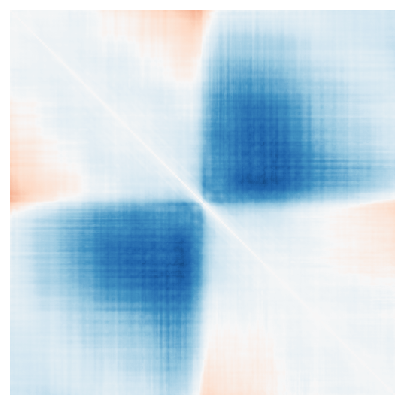

SEQ_ID:  234
	-target:  3


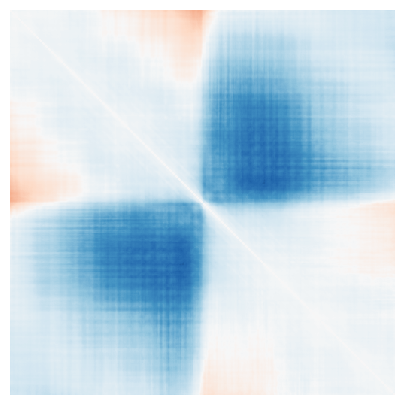

SEQ_ID:  277
	-target:  3


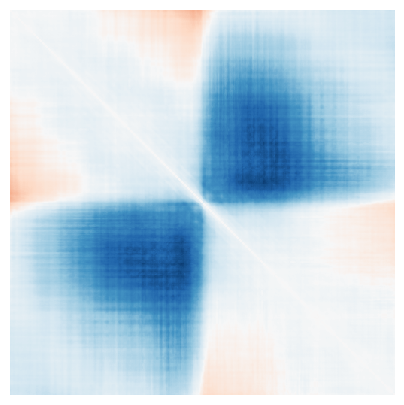

SEQ_ID:  296
	-target:  3


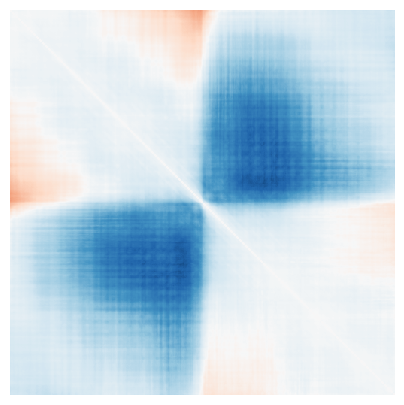

SEQ_ID:  297
	-target:  3


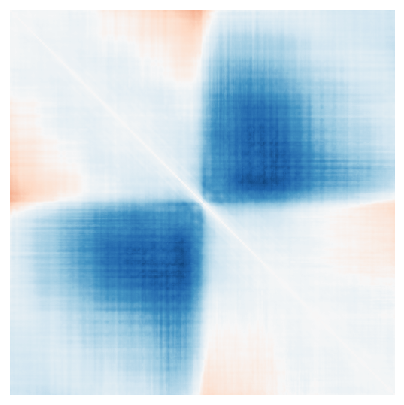

SEQ_ID:  304
	-target:  3


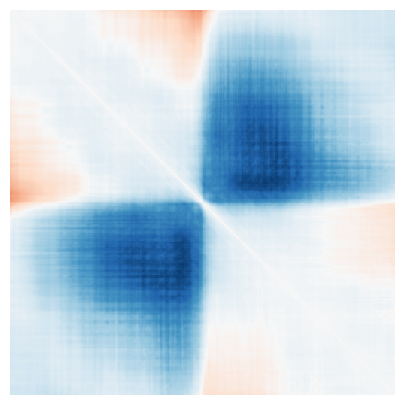

SEQ_ID:  310
	-target:  3


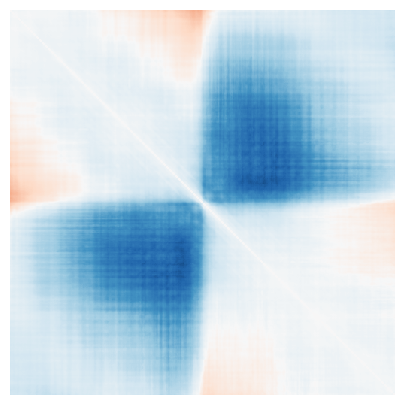

SEQ_ID:  351
	-target:  3


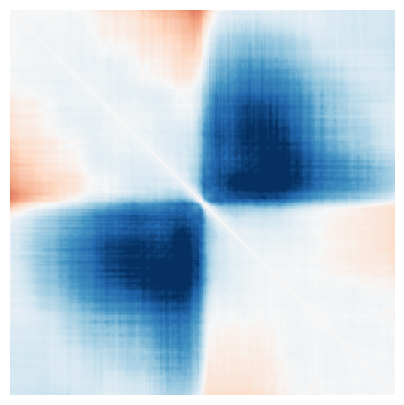

SEQ_ID:  376
	-target:  3


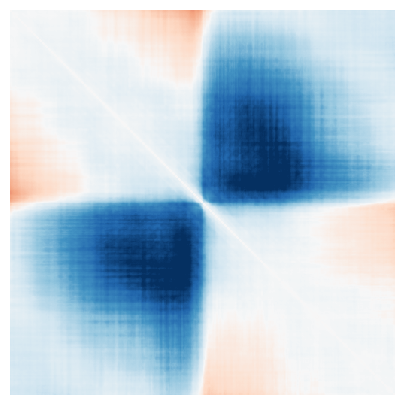

SEQ_ID:  414
	-target:  3


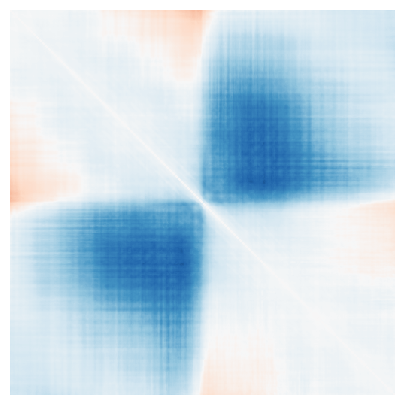

SEQ_ID:  436
	-target:  3


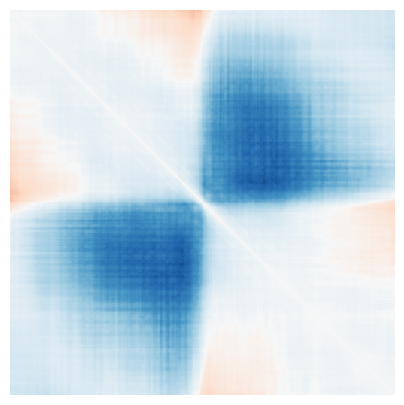

SEQ_ID:  480
	-target:  3


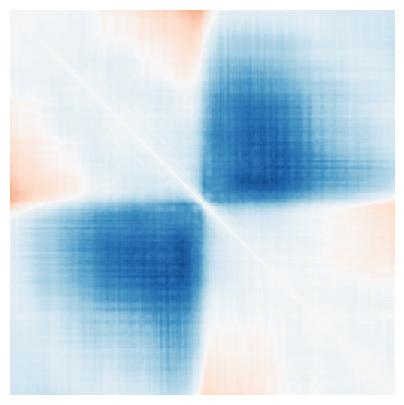

SEQ_ID:  574
	-target:  3


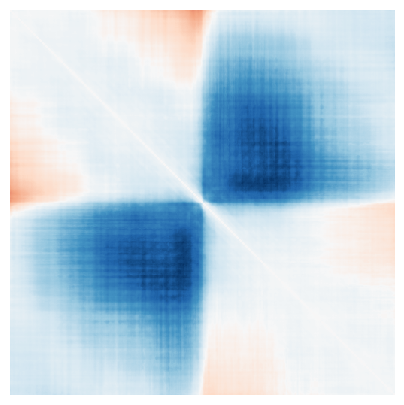

SEQ_ID:  618
	-target:  3


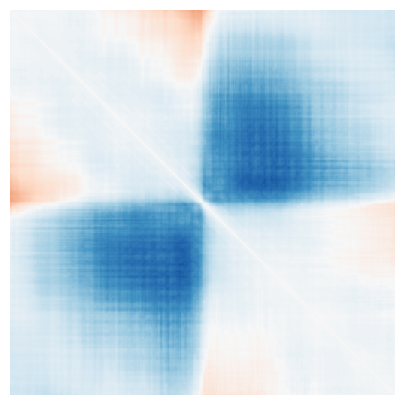

In [12]:
# Open the HDF5 file in read mode
with h5py.File(job_h5_file, "r") as hdf_file:
    for index in range(len(sample_exp_id)):
        seq_id = restricted_seq_ids[index]
        request_exp_id = sample_exp_id[index]
        
        print("SEQ_ID: ", seq_id)
        
        # Read the specific portion of the dataset without loading the entire dataset into memory
        experiment_slice = hdf_file[f"map_h{head_index}_m{model_index}"][request_exp_id, :, :]
        map_matrix = ut_dense(experiment_slice)

        for request_tg_id in request_tg_ids:
            print("\t-target: ", request_tg_id)
            plot_map(map_matrix[:, :, request_tg_id])

# Dot maps

In [14]:
# use if you want to visualize maps with dot score in a desired range

In [15]:
job_h5_file = f"/scratch2/smaruj/all_dots_vs_boundaries/maps_dots_all_motifs_m{model_index}/MAPS_OUT.h5"

SEQ_ID:  74
	-target:  3


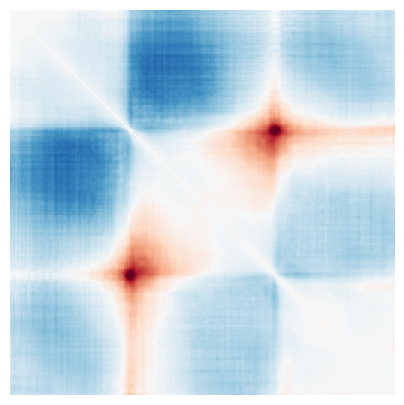

SEQ_ID:  220
	-target:  3


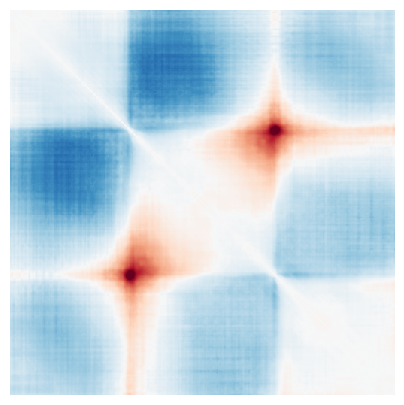

SEQ_ID:  234
	-target:  3


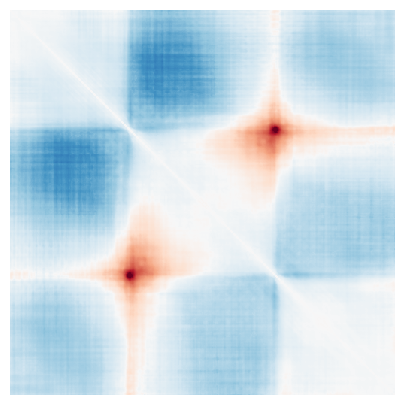

SEQ_ID:  277
	-target:  3


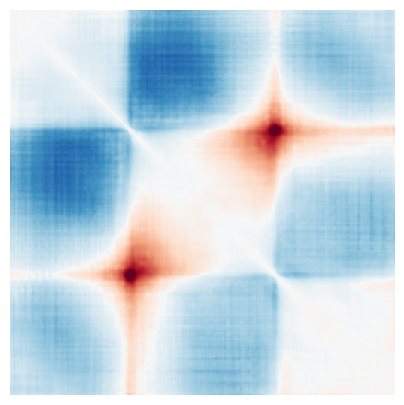

SEQ_ID:  296
	-target:  3


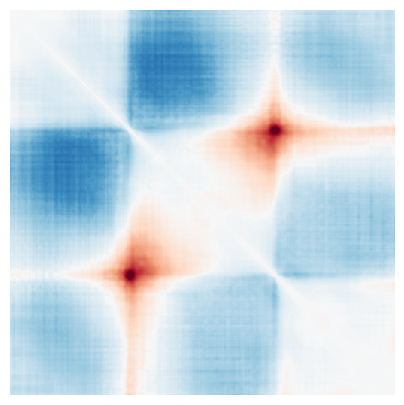

SEQ_ID:  297
	-target:  3


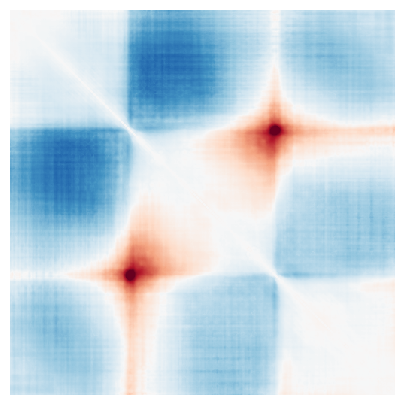

SEQ_ID:  304
	-target:  3


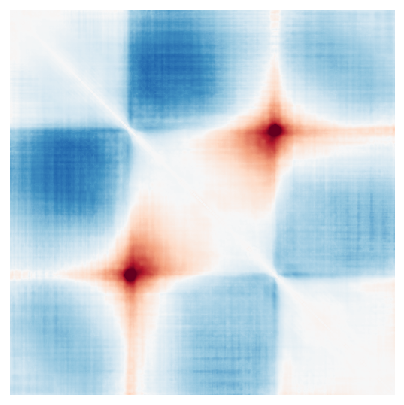

SEQ_ID:  310
	-target:  3


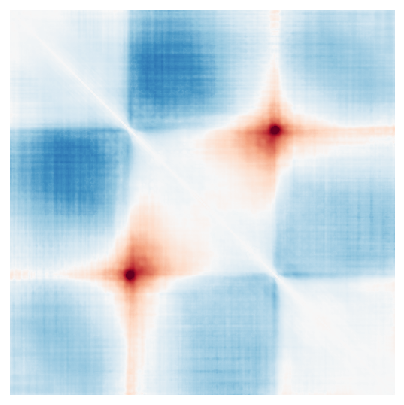

SEQ_ID:  351
	-target:  3


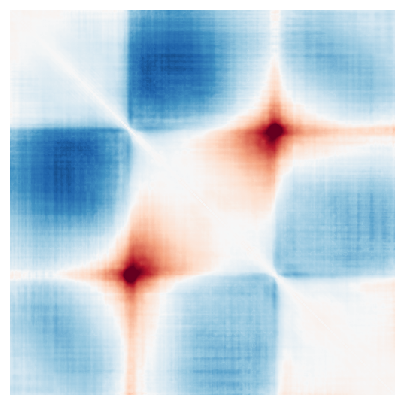

SEQ_ID:  376
	-target:  3


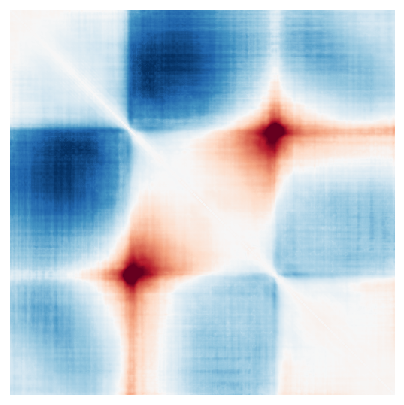

SEQ_ID:  414
	-target:  3


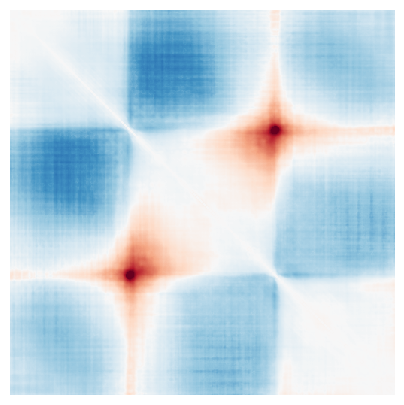

SEQ_ID:  436
	-target:  3


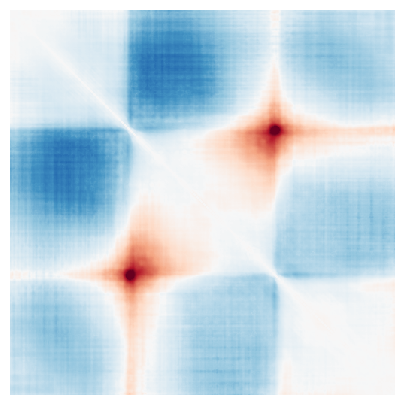

SEQ_ID:  480
	-target:  3


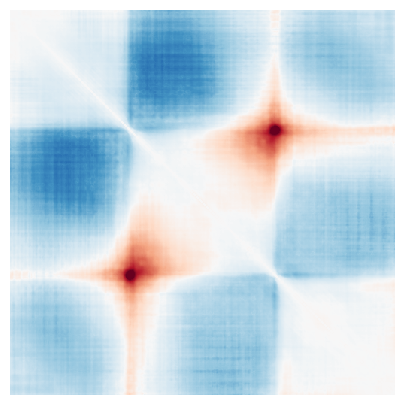

SEQ_ID:  574
	-target:  3


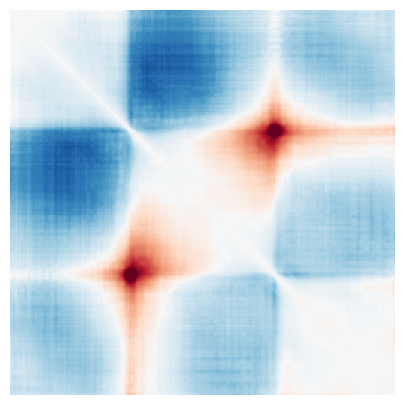

SEQ_ID:  618
	-target:  3


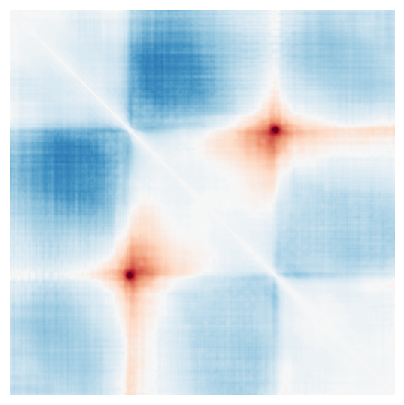

In [16]:
# Open the HDF5 file in read mode
with h5py.File(job_h5_file, "r") as hdf_file:
    for index in range(len(sample_exp_id)):
        seq_id = restricted_seq_ids[index]
        request_exp_id = sample_exp_id[index]
        
        print("SEQ_ID: ", seq_id)
        
        # Read the specific portion of the dataset without loading the entire dataset into memory
        experiment_slice = hdf_file[f"map_h{head_index}_m{model_index}"][request_exp_id, :, :]
        map_matrix = ut_dense(experiment_slice)

        for request_tg_id in request_tg_ids:
            print("\t-target: ", request_tg_id)
            plot_map(map_matrix[:, :, request_tg_id])